Easy: Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fct_invoice.csv")
df.columns = ['invoice_no', 'customer_id', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall']
print("There are", len(df['customer_id'].unique()), "unique customers in the data set.")

There are 5191 unique customers in the data set.


Easy: Question 2

In [2]:
print(df['category'].unique())
print("There are", len(df['category'].unique()), "unique category types.")

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
There are 8 unique category types.


Easy: Question 3

In [3]:
df['payment_method'].value_counts()

print("The most common payment method was", df['payment_method'].value_counts().nlargest(1).index[0]+", used", df['payment_method'].value_counts().nlargest(1)[0], "times.")

The most common payment method was Cash, used 44447 times.


Medium: Question 1

In [4]:
print(df.groupby('category').apply(lambda x: (x['quantity'] * x['price']).sum()).nlargest(3))

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
dtype: float64


Medium: Question 2

In [5]:
df2 = pd.read_json("dim_customer.json")
df2.columns = ['age','first_name','gender','id','last_name']
df3 = pd.merge(df, df2, left_on='customer_id', right_on='id')
df3['sales'] = df3['quantity'] * df3['price']
print(df3[df3['age'] > 45]['sales'].sum())

82039768.15


Medium: Question 3

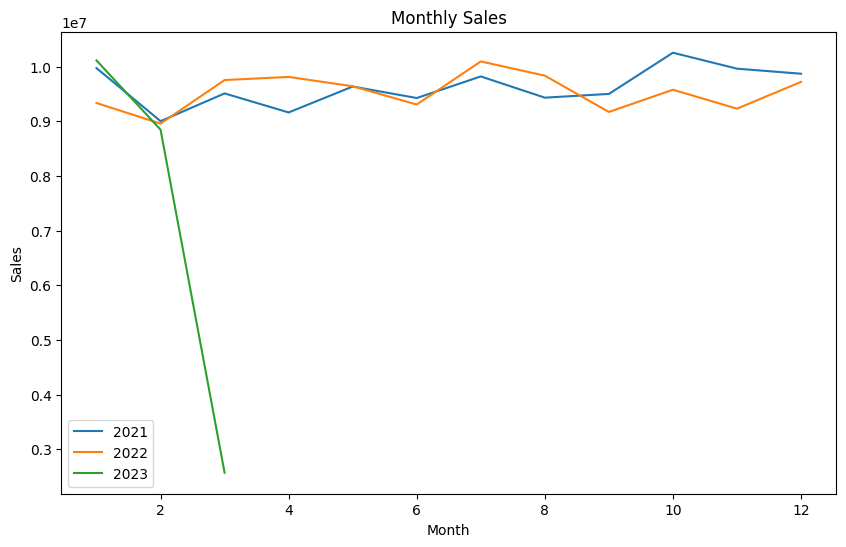

In [6]:
df3['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df3['year'] = df3['invoice_date'].dt.year
df3['month'] = df3['invoice_date'].dt.month
monthly_sales = df3.groupby(['year', 'month'])['sales'].sum()
monthly_sales = monthly_sales.unstack(level=0)
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(['2021', '2022', '2023'])
plt.show()

The sales can be said to experience dips in February, June, August, and November. The sales can also be said to experience surges at March, July, September, and December.

Hard: Question 1

In [7]:
df3['decade'] = pd.cut(df3['age'], bins=range(10, 101, 10), right=False)
pivot_table = pd.pivot_table(df3, values='sales', index='decade', columns='category', aggfunc='sum')
print(pivot_table)

category      Books     Clothing  Cosmetics  Food & Beverage       Shoes  \
decade                                                                     
[10, 20)   12801.75   1927413.84  109619.36         13582.31   993281.35   
[20, 30)   79461.75  10250732.80  605915.32         73491.96  5924878.24   
[30, 40)   84143.10  11354126.96  723544.70         87246.86  7200839.66   
[40, 50)   87203.40  11215189.92  665034.96         89553.29  7025590.02   
[50, 60)   74962.20  10321851.76  587780.96         72425.04  5852857.84   
[60, 70)   80476.80  10660642.08  649990.76         80976.09  5978893.54   
[70, 80)   54827.85   7769371.28  419082.62         55050.98  4480269.05   
[80, 90)   26664.00   4493698.00  254531.60         31332.93  2628744.60   
[90, 100)      0.00         0.00       0.00             0.00        0.00   

category   Souvenir  Technology       Toys  
decade                                      
[10, 20)   12375.15   1129800.0   60426.24  
[20, 30)   54943.32   526155